**Analysis**

In [11]:
import pandas as pd
df=pd.read_csv('winequality.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
# заповнення нульових величин
df.isnull().mean()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


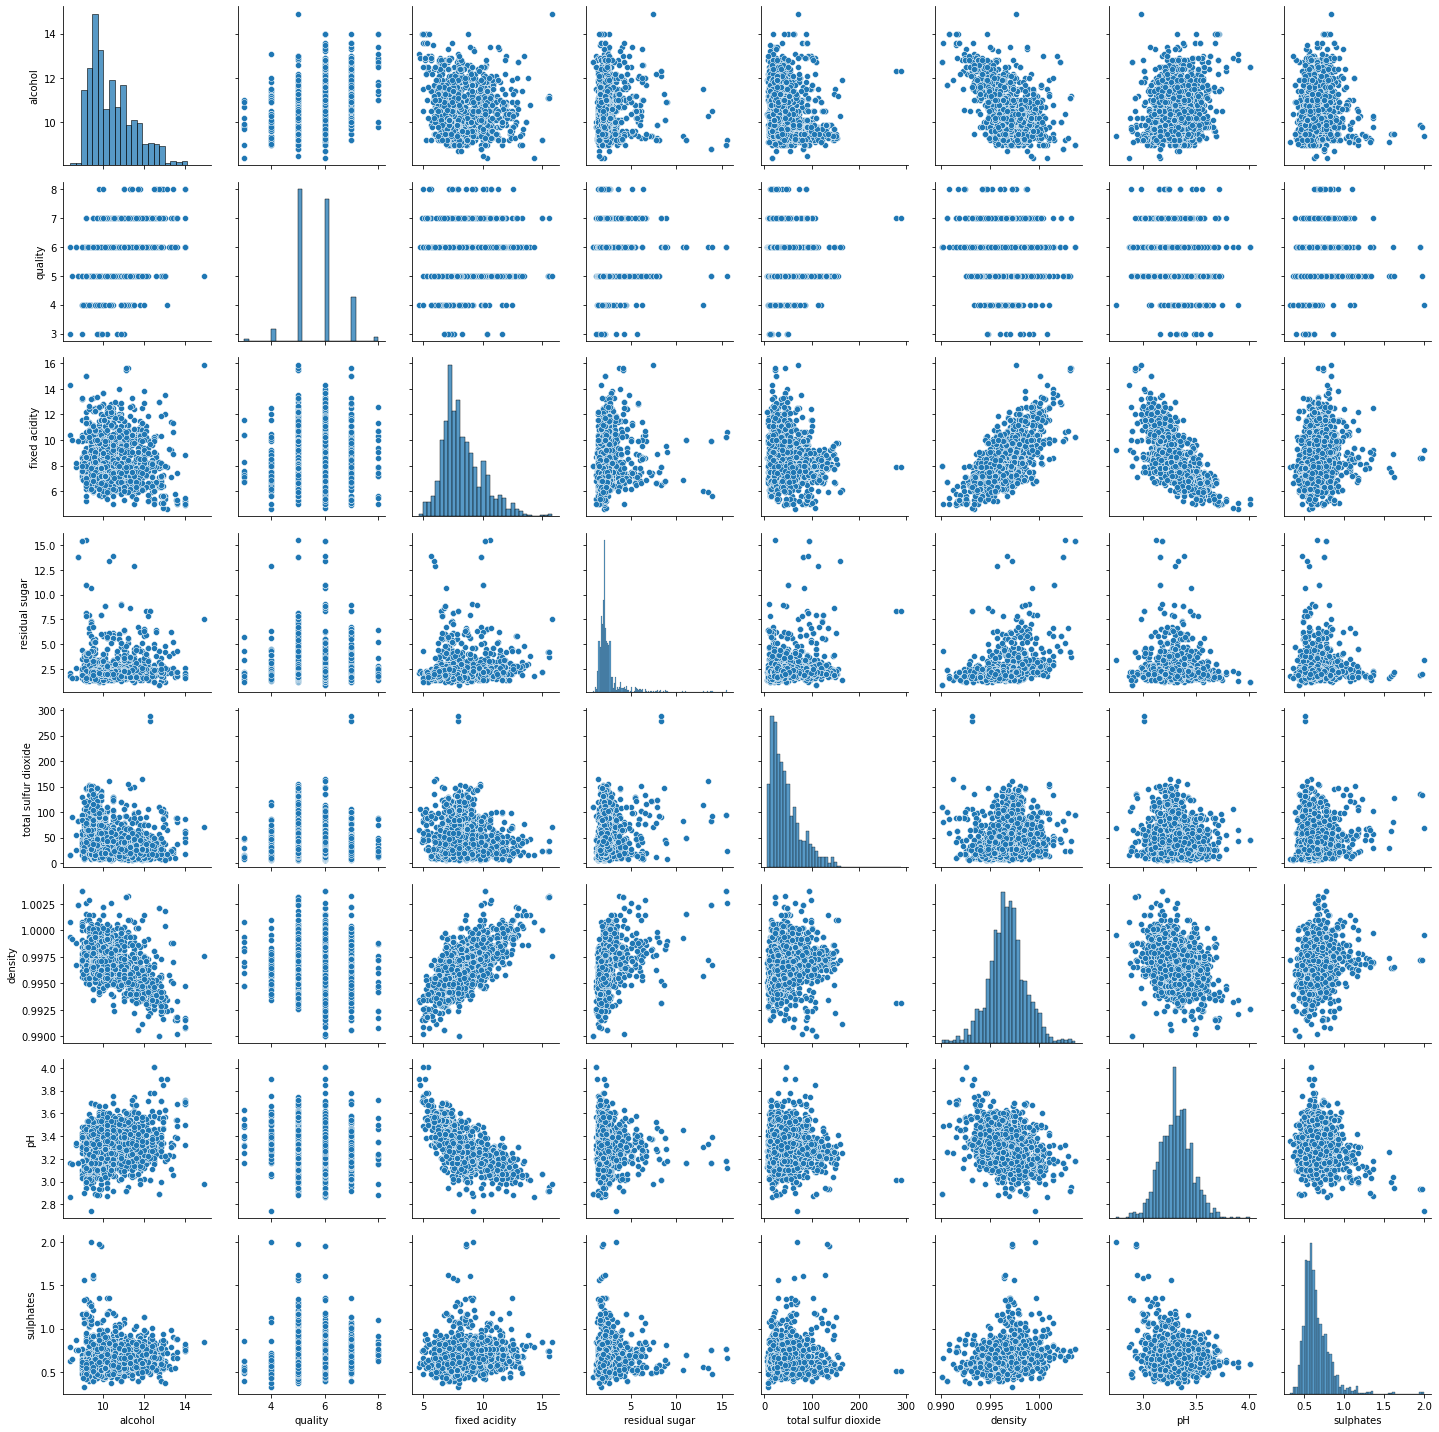

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#feature selection
columns = ['alcohol','quality','fixed acidity', 'residual sugar','total sulfur dioxide','density','pH','sulphates']
sns.pairplot(df[columns]);
plt.tight_layout();
plt.show()

#можемо побачити, наприклад, лінійну залежність кислотності(fixed acidity) від густини(density), або кислотності від водневого показника (pH)


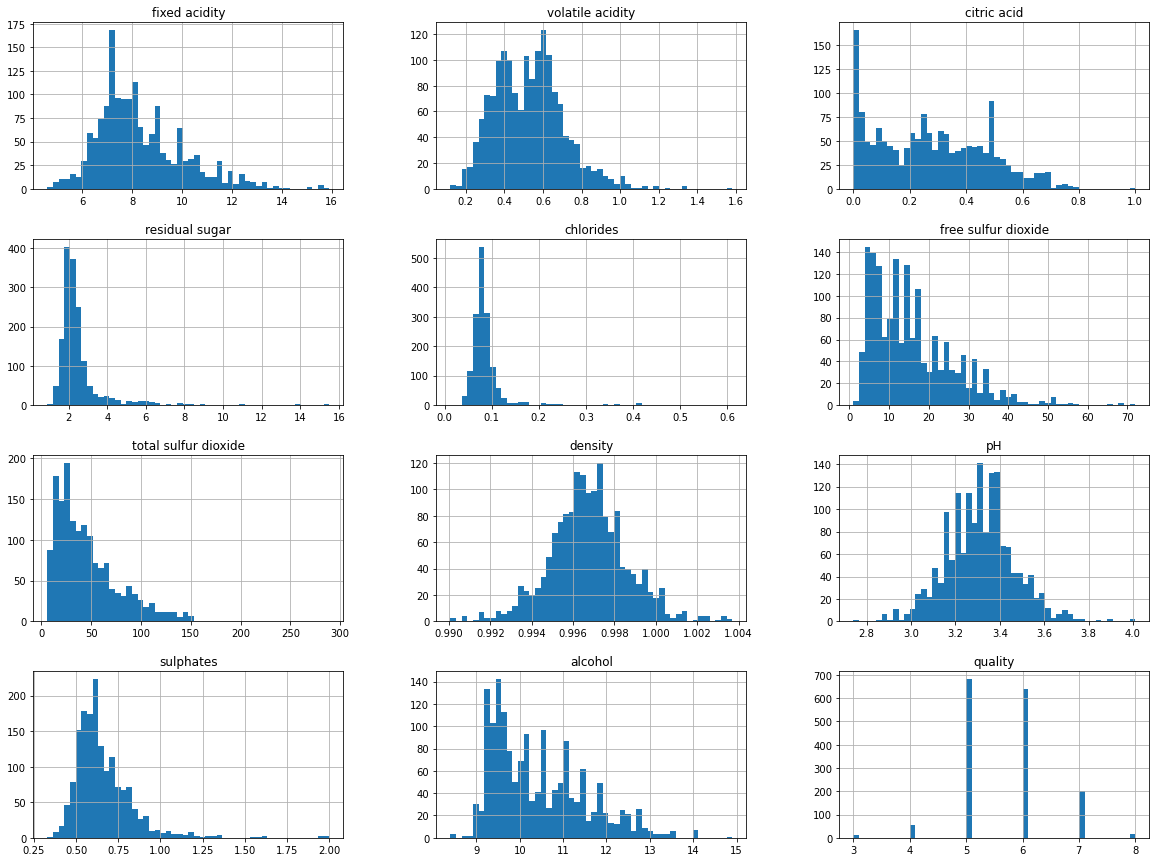

In [16]:
df.hist(bins=50,figsize=(20,15))
plt.show()
#можна, наприклад, зробити висновок, що вміст хлоридів у вині частіше за все не перевищує 0.1

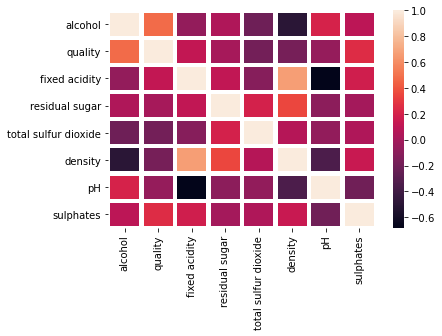

In [47]:
#матриці кореляції
import numpy as np

cm=df[columns].corr()
hm=sns.heatmap(data =cm,cbar = True,annot = False,square = False,xticklabels =columns,yticklabels = columns,linewidths = 3.2)
plt.show()
#видно, що показник кислотності дуже корелює з густиною; також добре видно взаємозв'язок між вмістом спирту (alcohol) та показником якості
#натомість, до прикладу, вміст спирту слабо впливає на густину
#можна зробити висновок, що якість вина більше залежить від кількості спирту та сульфатів і значно менше від діоксиду сірки (total sulfur dioxide)

In [48]:
mcorr=df.corr()
mcorr["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<AxesSubplot:xlabel='alcohol', ylabel='sulphates'>

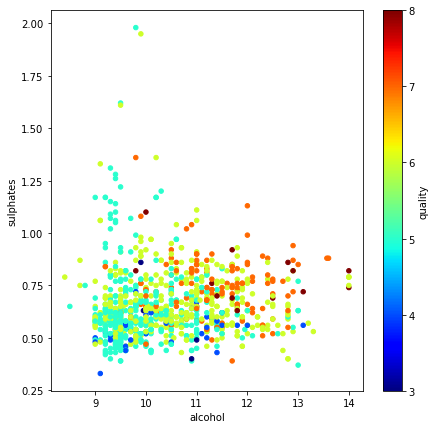

In [46]:
np.random.seed(42)
sample = df.sample(n=1000)
sample.plot(kind="scatter",x="alcohol",y="sulphates",figsize=(7,7),c="quality",cmap=plt.get_cmap("jet"),colorbar=True,sharex=False)
#можемо оцінити яке співвідношення спирту та сульфатів дає найкращу якість

In [49]:
x = df.drop('quality',axis=1)
y = df['quality']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polinomial_degree = 2;
polynomial_features = PolynomialFeatures(degree=polinomial_degree,include_bias=False)
linear_regression = LinearRegression(normalize=True)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(x_train, y_train)


Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression(normalize=True))])

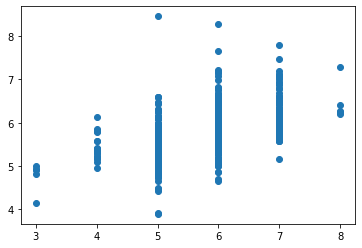

In [51]:
predictions = pipeline.predict(x_test)
plt.scatter(y_test,predictions)

In [37]:
 from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5553836788629573
MSE: 0.5236996300220139
RMSE: 0.7236709404294288


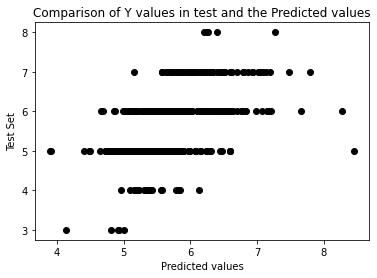

In [38]:
y_predicted = pipeline.predict(x_test)

plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(y_predicted, y_test,  color='black')
plt.show()

In [43]:
delta = abs(y_test.values -predicted)
maxVal = -101
index =0
for i in range(y_test.shape[0]):
    if(delta[i] > maxVal):
        maxVal= delta[i];
        index = i;

print("max val index: ",index)
print("max val: ",maxVal)

max val index:  75
max val:  3.456134856574863


In [44]:
x_test.iloc[index]

fixed acidity           15.9000
volatile acidity         0.3600
citric acid              0.6500
residual sugar           7.5000
chlorides                0.0960
free sulfur dioxide     22.0000
total sulfur dioxide    71.0000
density                  0.9976
pH                       2.9800
sulphates                0.8400
alcohol                 14.9000
Name: 652, dtype: float64

In [45]:
print("predicted one: ",predicted[index],
      " from dataset: ",y_test.iloc[index])


predicted one:  8.456134856574863  from dataset:  5


**Feature importance**


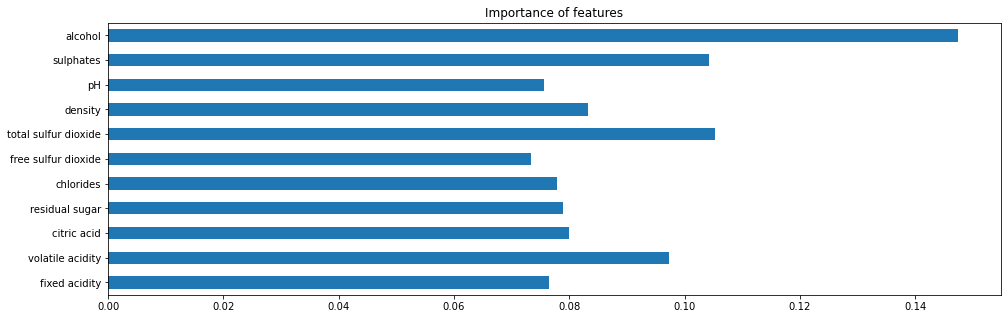

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
X = df.drop(["quality"],axis=1)
Y = df["quality"]
bestfeatures2 = ExtraTreesClassifier()
fit2 = bestfeatures2.fit(X,Y)
feat_importances = pd.Series(fit2.feature_importances_, index=X.columns)
plt.figure(figsize = (16,5))
feat_importances.plot(kind='barh')
plt.title("Importance of features")
plt.show()

**Custom train model**

In [52]:
def normalize(X):

    mean =np.mean(X) 
    std = np.std(X)
    X_new = (X-mean)/std
    return X_new, mean, std

In [53]:
def prepare_X(X):

    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [54]:
def cost_function(X, y, theta):

    m = X.shape[0]
    if m == 0:
        return None
    J = sum((hypothesis(X,theta) - y)**2)/(2*m);
    return J

In [55]:

def hypothesis(X, theta):
    h_thetha = X.dot(theta);
    return h_thetha

In [56]:
def derivative(X, y, theta):
    m = X.shape[0]

    d_thetha = np.dot(hypothesis(X, theta) - y, X) / m
    return d_thetha

In [57]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):

    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        J = cost_function(X, y, theta)
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [62]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0,0,0,0,0,0,0,0,0,0,0])

In [63]:
y = y_train[:]
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (959, 12)
y: (959,)
16.209071949947862


In [64]:
alpha = 0.01
num_iters = 1500
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 5.636077650510489; Theta 1: 0.05158257924067728


In [66]:
X_test_proc = (X_test.copy() - mean) / std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 0.5195102220883666
MSE: 0.42966443293771645
RMSE: 0.6554879350054557
